# The python API for accessing Arivale data

Access to standardized arivale data is managed by the `arivale_data_interface` python package. This will mange file locations and will keep track of recent data updates for you. There are 3 functions that you will use a lot:

1. `list_local_snapshots` will show all Arivale data versions, called `snapshot`. Snapshots are the Arivale data captured at a distinct date.
2. `list_snapshot_contents` will list all data sets contained in specified snapshot (defaulting to the most recent one).
3. `get_snapshot` will load a data sets from the chosen snapshot (again defaulting to the most recent one).

Let's see those in action 🥁.

## Listing snapshots

In [1]:
import pandas as pd
import arivale_data_interface as adi
# apply settings so the lib knows where the data is
adi.apply_isb_config()

#list the local snapshots
local_snapshots = adi.list_local_snapshots()
print(len(local_snapshots))
local_snapshots[0]

98


'/proj/arivale/snapshots/arivale_snapshot_ISB_2020-03-16_2156'

So there have been 98 releases so far with the most recent one bein the date shown above.

## Listing data sets

The snapshots are [pandas](https://pandas.pydata.org/) dataframes.

Given a shapshot, you can see the datafiles available

Most of the functions take a `path` parameter that defaults to most recent snapshot.

In [7]:
adi.list_snapshot_contents().basename.tolist()

['proteomics_metadata.tsv',
 'microbiome_dashboard.tsv',
 'assessments_exercise_readiness.tsv',
 'assessments_health_history_old.tsv',
 'analyte_ranges.tsv',
 'wearables_raw_monthly.tsv',
 'metabolomics_corrected.tsv',
 'assessments.tsv',
 'microbiome_trimmed_diversity.tsv',
 'assessments_lifestyle.tsv',
 'microbiome_trimmed_otus.tsv',
 'assessments_digestive_health.tsv',
 'weight_raw.tsv',
 'genetics_kinship.tsv',
 'microbiome_genera.tsv',
 'chemistries_rfx_omit.tsv',
 'microbiome_trimmed_pathways.tsv',
 'medication_compliance.tsv',
 'microbiome_trimmed_modules.tsv',
 'microbiome_trimmed_taxa_counts.tsv',
 'fasting_status.tsv',
 'metabolomics_metadata.tsv',
 'proteomics_corrected.tsv',
 'wearables_raw.tsv',
 'assessments_diet_remapped.tsv',
 'clients_raw.tsv',
 'metabolomics_corrected_external.tsv',
 'assessments_vitals.tsv',
 'weight_raw_monthly.tsv',
 'metabolomics_samples.tsv',
 'assessments_happiness.tsv',
 'microbiome_trimmed_kos.tsv',
 'proteomics_LOD.tsv',
 'microbiome_pathways

So we have more than 70 data sets in the most recent snapshot. The name of each dataset is the partr before the `.tsv` and you can use the name to load the dataset.

## Loading datasets

Let's start by loading the diet self-assessments.

In [3]:
client_info_df = adi.get_snapshot('assessments_diet')
# head returns only the first couple rows of a pandas dataframe, useful for a quick look at the data
client_info_df.head()

/users/jcavon/miniconda3/envs/arivale-py/lib/python3.11/site-packages/arivale_data_interface/snapshots_interface.py:271: DeprecationWarning: `assessments_diet` is slated for deprecation and will be part of `assessments` with raw data will be available in `assessments_raw`
  check_deprecation(name) # check if requested snapshot is to be deprecated


,public_client_id,vendor,days_in_program,days_since_first_call,days_since_first_draw,month,weekday,season,assessment:diet:avoid_dairy:int,assessment:diet:bread:int,...,assessment:diet:freq_yogurt:int,assessment:diet:milk:int,assessment:diet:salt_in_food:int,assessment:diet:slices_of_bread:int,assessment:diet:spread:int,assessment:diet:sugar:int,assessment:diet:sugar_coffee:int,assessment:lifestyle:grains:enum,response_count,response_pct
0,01000261,Health 123,37.0,-37.0,-28.0,Dec,Tue,winter,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(0) Zero/less than 1 per day,1.0,2.6
1,01000552,Assessments,0.0,NaN,NaN,Mar,Fri,spring,(2) Yes,(3) Whole grain,...,(2) 1-3 times per month,(2) 1-2%,(3) Taste food but only occasionally add salt,(2) 1,(4) Other,(2) No,(3) Yes,(1) 1-2,39.0,100.0
2,01001298,Assessments,0.0,-7.0,-7.0,Aug,Tue,summer,(2) Yes,(3) Whole grain,...,(2) 1-3 times per month,(7) Do not drink milk,(4) Rarely or never add salt to food,(1) Less than 1,(4) Other,(2) No,(2) No,(1) 1-2,39.0,100.0
3,01001467,Assessments,0.0,-14.0,-15.0,May,Tue,spring,(1) No,(2) Wheat (not whole wheat),...,(3) Once per week,(3) Skimmed,(1) Generally add salt to food without tasting...,(2) 1,(1) Butter,(1) I don't drink tea,(1) I don't drink coffee,(2) 3-4,39.0,100.0
4,01001548,Assessments,4.0,-5.0,-3.0,Oct,Fri,fall,(1) No,(3) Whole grain,...,(2) 1-3 times per month,(2) 1-2%,(3) Taste food but only occasionally add salt,(3) 2-3,(1) Butter,(2) No,(2) No,(2) 3-4,39.0,100.0


As you see it will also alert us to upcoming changes. As you can see it contains diet questionaire results for each individual. There are a few columns here that you will see in almost any Arivale data set so let's give you an overview about those:

- **public_client_id**: This is a unique ID for the particular individual. It will be the same across all Arivale data sets.
- **vendor**: The company that provided the data.
- **days_in_program**: Days passed since the individual joined Arivale.
- **days_since_first_call**: Days since the individual had their first interaction with an Arivale coach.
- **days_since_first_draw**: Days since the individual had their first blood draw taken.
- **month**, **weekday**, **season**: Some indicators when that measurement was taken.

Those are the data that you will use to join different data sets from Arivale. Note that Arivale data is *anonymized*, meaning that all information that would help you identify an individual has been removed. This is why you will never see dates but rather relative time frames like `days_in_program`. 

Let's look at another example and open the blood chemistry data.

In [14]:
# the clinical labs are what you get at the doctors office
# there are 2 vendors and you are better off looking at them separately
clinical_labs_df = adi.get_snapshot('chemistries')
clinical_labs_df.head()

,public_client_id,vendor,vendor_observation_id,observation_id,reflexive,fasting,days_in_program,days_since_first_call,days_since_first_draw,month,...,"VITAMIN D3, 25-OH",VLDL LDL PARTICLE NUMBER,VLDL PARTICLE NUMBER,VLDL SIZE PERCENTILE,VLDL TRIGLYCERIDES,WHITE CELL COUNT,ZINC,"ZINC, RBC",leptin,zinc_plasma_or_serum
0,01000261,Quest,YH289668,10271,False,TRUE,65,-9.0,0,Jan,...,58.0,NaN,NaN,NaN,NaN,5.9,980.0,9.8,NaN,NaN
1,01000261,LCA,B0040998784,65656,False,TRUE,198,124.0,133,May,...,NaN,1753.0,45.5,48.9,69.1,4.9,1410.0,NaN,NaN,NaN
2,01001298,LCA,AV27365801,2837393,False,TRUE,7,0.0,0,Sep,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01001467,LCA,AV29176623,2500980,False,TRUE,15,1.0,0,Jun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01001467,LCA,AV29431391,3306809,True,TRUE,223,209.0,208,Jan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You should recognize the first few columns now. Note that for the first column the `days_since_first_draw` value is zero. So the measurements were obtained from the individuals first blood draw. If you want to make the column names more consistent you can also use the `clean` argument.

In [20]:
# the clean parameter removes special characters from the column names
clean_clinical_labs_df = adi.get_snapshot('chemistries', clean=True)
clean_clinical_labs_df.head()

,public_client_id,vendor,vendor_observation_id,observation_id,reflexive,fasting,days_in_program,days_since_first_call,days_since_first_draw,month,...,"VITAMIN D3, 25-OH",VLDL LDL PARTICLE NUMBER,VLDL PARTICLE NUMBER,VLDL SIZE PERCENTILE,VLDL TRIGLYCERIDES,WHITE CELL COUNT,ZINC,"ZINC, RBC",leptin,zinc_plasma_or_serum
0,01000261,Quest,YH289668,10271,False,TRUE,65,-9.0,0,Jan,...,58.0,NaN,NaN,NaN,NaN,5.9,980.0,9.8,NaN,NaN
1,01000261,LCA,B0040998784,65656,False,TRUE,198,124.0,133,May,...,NaN,1753.0,45.5,48.9,69.1,4.9,1410.0,NaN,NaN,NaN
2,01001298,LCA,AV27365801,2837393,False,TRUE,7,0.0,0,Sep,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01001467,LCA,AV29176623,2500980,False,TRUE,15,1.0,0,Jun,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01001467,LCA,AV29431391,3306809,True,TRUE,223,209.0,208,Jan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's have a quick look at how many measurements there are.

In [6]:
clinical_labs_df.shape

(11167, 140)

In [7]:
len(clinical_labs_df.public_client_id.unique())

4881

So there are >11k measurements over a little less than 5K individuals. So that shows you that the same individual might have been measured more than once. Let's have a look how often participants were measured.

In [12]:
clean_clinical_labs_df.public_client_id.value_counts().value_counts()

count
1     1974
2     1193
3      879
4      401
5      241
6       79
7       53
8       37
9       20
10       4
Name: count, dtype: int64

So a little less than half of the individuals have only one measurement whereas only 4 individuals have 10 measurements.

# Visualization

There are a few options to visualize data from DataFrames.

- [Matplotlib](https://matplotlib.org/) is the main plotting library in python and has the most features. Most of the others are based on it.
- [Seaborn](https://seaborn.pydata.org/) is nice if you want quick nice looking plots.
- [plotnine](https://plotnine.readthedocs.io/en/stable/) if you are already familiar with ggplot.
- [Pandas](https://https://pandas.pydata.org/pandas-docs/stable/visualization.html) has some basic plotting built in

Let's start with the plotting cability included in pandas. Let's look at the white cell counts.

<Axes: >

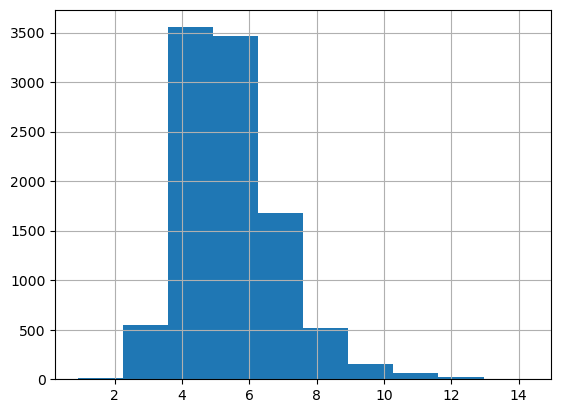

In [18]:
# if you want plots to show up in the notebook you need to run this
%matplotlib inline
clean_clinical_labs_df['WHITE CELL COUNT'].hist()

Or use matplotlib to show histograms of LDL/HDL/Adiponectin levels.

In [32]:
chol_columns = [col for col in clean_clinical_labs_df.columns if 'ADIPONECTIN' in col.upper()]

print("Columns containing 'CHOL':", chol_columns)

Columns containing 'CHOL': ['ADIPONECTIN, SERUM']


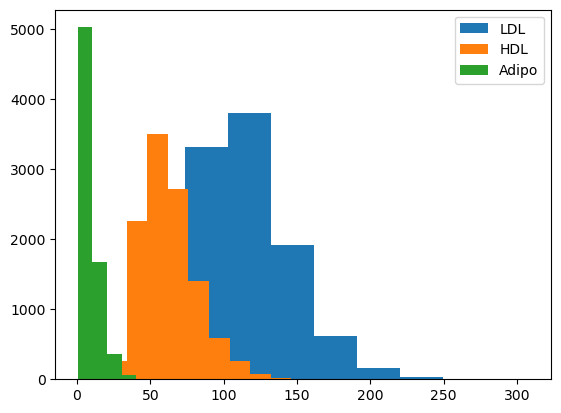

In [33]:
#matplotlib
import matplotlib.pyplot as plt

plt.hist(clean_clinical_labs_df['LDL-CHOL CALCULATION'].dropna(), label="LDL")
plt.hist(clean_clinical_labs_df['HDL CHOL DIRECT'].dropna(), label="HDL")
plt.hist(clean_clinical_labs_df['ADIPONECTIN, SERUM'].dropna(), label='Adipo')
plt.legend()

Or use seaborn to show the relationship between HDL and LDL.

/users/jcavon/miniconda3/envs/arivale-py/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/users/jcavon/miniconda3/envs/arivale-py/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/users/jcavon/miniconda3/envs/arivale-py/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/users/jcavon/miniconda3/envs/arivale-py/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

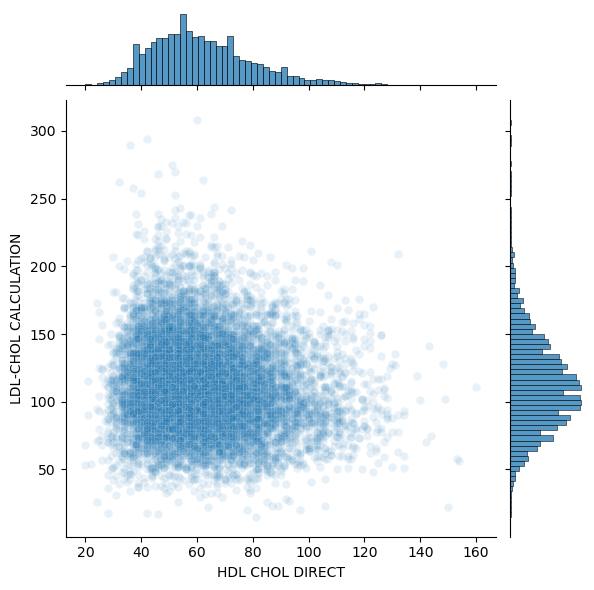

In [36]:
# seaborn
import seaborn as sns

sns.jointplot(x='HDL CHOL DIRECT', y='LDL-CHOL CALCULATION', data=clean_clinical_labs_df, alpha=0.1)

# Basic analysis

- [Numpy](http://www.numpy.org/) is the main python library for efficiently computing on arrays/matrices
- [Scipy](https://www.scipy.org/) is the main python library for basic stats and scientific computing modules
- [Statsmodels](http://www.statsmodels.org/stable/index.html) gives basic statistical modeling
- [Scikit-learn](http://scikit-learn.org/stable/) provides machine learning in python

For instance to get the Spearman correlation between HDL and LDL we can use scipy...

In [37]:
import scipy.stats

# basic stats functions in scipy
scipy.stats.spearmanr(clean_clinical_labs_df['HDL CHOL DIRECT'], clean_clinical_labs_df['LDL-CHOL CALCULATION'], nan_policy='omit')

SignificanceResult(statistic=-0.10396103387357285, pvalue=6.0344256038918505e-28)

or we can use statsmodels for a regression:

In [40]:
from statsmodels.formula.api import glm

result = glm("Q('HDL CHOL DIRECT') ~ Q('LDL-CHOL CALCULATION')", data=clean_clinical_labs_df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     Q('HDL CHOL DIRECT')   No. Observations:                11054
Model:                              GLM   Df Residuals:                    11052
Model Family:                  Gaussian   Df Model:                            1
Link Function:                 Identity   Scale:                          340.33
Method:                            IRLS   Log-Likelihood:                -47906.
Date:                  Wed, 27 Sep 2023   Deviance:                   3.7613e+06
Time:                          23:18:51   Pearson chi2:                 3.76e+06
No. Iterations:                       3   Pseudo R-squ. (CS):            0.01214
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    69.2050      0.623    111.134      0.000      67.984      70.426
Q('LDL-CHOL CALCULATION')    -0.0618      0.005    -11.620      0.000      -0.072      -0.051
=============================================================================================
"""

# Feature data

Let's finish by looking at a common scheme to organize data in Arivale. For many of the multiomics data you will have high-dimensional data but also additional annotations. For instance, let's have a look at the metabolomics data:

In [55]:
met_df = adi.get_snapshot('metabolomics_corrected')
met_df.head()

,public_client_id,sample_id,days_in_program,days_since_first_call,days_since_first_draw,month,weekday,season,35,50,...,999953114,999953157,999953172,999953266,999953267,999954831,999954832,999954834,999954839,999954840
0,01000261,A477AV558-002,65,-9.0,0,Jan,Tue,winter,0.972222,2.568898,...,1.045152,0.592175,0.437347,0.615018,0.923405,1.106525,1.129321,1.136554,0.376786,NaN
1,01001621,A391BM948-002,265,223.0,254,Apr,Wed,spring,1.819302,0.704097,...,NaN,0.737648,1.109209,0.391366,0.844609,NaN,NaN,NaN,NaN,NaN
2,01001621,A776BI445-003,11,-31.0,0,Jul,Mon,summer,2.540378,0.568236,...,2.198704,1.036609,2.861960,0.980013,1.245966,NaN,NaN,NaN,NaN,NaN
3,01002183,A595AV320-002,13,-1.0,0,Jan,Wed,winter,0.528804,2.260729,...,0.772146,3.109291,1.689441,0.923594,0.896029,0.915957,0.859884,0.862706,0.364450,0.932469
4,01002412,A294AU415-002,13,-6.0,0,Nov,Thu,fall,0.863152,0.535317,...,0.725215,1.702258,1.155391,1.151021,NaN,0.913408,0.886259,NaN,0.214291,0.639387


So you see that there are metabolite IDs in the columns but what do those IDs actually refer to? What is the ID for glucose for example? This info can be found in the metadata table.

In [41]:
met_meta = adi.get_snapshot('metabolomics_metadata')
met_meta.head()

,CHEMICAL_ID,SUB_PATHWAY,SUPER_PATHWAY,BIOCHEMICAL_NAME,CAS,KEGG,HMDB,PUBCHEM,MEAN_WITHIN_BATCH_CV,MEDIAN_WITHIN_BATCH_CV,ACROSS_BATCH_CV,NUM_CONTROLS_DETECTED,PERCENT_CONTROLS_DETECTED,TOTAL_CONTROLS,NUM_SAMPLES_DETECTED,PERCENT_SAMPLES_DETECTED,TOTAL_SAMPLES
0,35,Glutamate Metabolism,Amino Acid,S-1-pyrroline-5-carboxylate,2906-39-0,C04322,HMDB01301,1196.0,0.162202,0.139341,0.192636,326.0,0.867021,376.0,3320,0.901194,3684
1,50,Polyamine Metabolism,Amino Acid,spermidine,124-20-9,C00315,HMDB01257,1102.0,0.241373,0.182074,0.303263,327.0,0.869681,376.0,3260,0.884908,3684
2,55,Nicotinate and Nicotinamide Metabolism,Cofactors and Vitamins,1-methylnicotinamide,1005-24-9,C02918,HMDB00699,457.0,0.050886,0.050132,0.115951,353.0,0.938830,376.0,3478,0.944083,3684
3,62,"Fatty Acid, Dihydroxy",Lipid,"12,13-DiHOME",263399-35-5,C14829,HMDB04705,10236635.0,0.216505,0.187954,0.263865,339.0,0.901596,376.0,3145,0.853692,3684
4,71,Tryptophan Metabolism,Amino Acid,5-hydroxyindoleacetate,54-16-0,C05635,HMDB00763,1826.0,0.186913,0.180845,0.248278,127.0,0.337766,376.0,1512,0.410423,3684


Here the `CHEMICAL_ID` refers to the column name in the first table. And the first row contains afull description of what that metabolite refers to. Similar formats can be found for the proteomics and microbiome data.

In [42]:
met_meta.shape

(1348, 17)

In [49]:
met_meta.CHEMICAL_ID.unique

<bound method Series.unique of 0              35
1              50
2              55
3              62
4              71
          ...    
1343    999954834
1344    999954839
1345    999954840
1346    100002397
1347    100020578
Name: CHEMICAL_ID, Length: 1348, dtype: int64>